In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read CSV file
music_df = pd.read_csv("3_spotify_5000_songs.csv", index_col=0)
# Replacing white space from the column names
music_df.columns = music_df.columns.str.replace(" ", "")
# Set the index to song_name
music_df.set_index("name", inplace=True)
# Drop the unnecessary columns
music_df.drop(['id', 'html', 'artist', 'type', 'key', 'mode', 'time_signature'], axis=1, inplace=True)

music_df.head()

danceability  energy  \
name                                                                       
Se Eu Quiser Falar Com Deus                    ...         0.658  0.2590   
Saudade De Bahia                               ...         0.742  0.3990   
Canta Canta, Minha Gente                       ...         0.851  0.7300   
Mulher Eu Sei                                  ...         0.705  0.0502   
Rosa Morena                                    ...         0.651  0.1190   

                                                    loudness  speechiness  \
name                                                                        
Se Eu Quiser Falar Com Deus                    ...   -13.141       0.0705   
Saudade De Bahia                               ...   -12.646       0.0346   
Canta Canta, Minha Gente                       ...   -11.048       0.3470   
Mulher Eu Sei                                  ...   -18.115       0.0471   
Rosa Morena                                    ...   -19.807       0.0380   

                                                    acousticness  \
name                                                               
Se Eu Quiser Falar Com Deus                    ...         0.694   
Saudade De Bahia                               ...         0.217   
Canta Canta, Minha Gente                       ...         0.453   
Mulher Eu Sei                                  ...         0.879   
Rosa Morena                                    ...         0.916   

                                                    instrumentalness  \
name                                                                   
Se Eu Quiser Falar Com Deus                    ...          0.000059   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000063   
Mulher Eu Sei                                  ...          0.000041   
Rosa Morena                                    ...          0.000343   

                                                    liveness  valence  \
name                                                                    
Se Eu Quiser Falar Com Deus                    ...     0.975    0.306   
Saudade De Bahia                               ...     0.107    0.693   
Canta Canta, Minha Gente                       ...     0.124    0.905   
Mulher Eu Sei                                  ...     0.386    0.524   
Rosa Morena                                    ...     0.104    0.402   

                                                      tempo  duration_ms  
name                                                                      
Se Eu Quiser Falar Com Deus                    ...  110.376       256213  
Saudade De Bahia                               ...  125.039       191867  
Canta Canta, Minha Gente                       ...   93.698       152267  
Mulher Eu Sei                                  ...  106.802       186227  
Rosa Morena                                    ...  120.941       273680

# Scaling

## MinMax Scaling

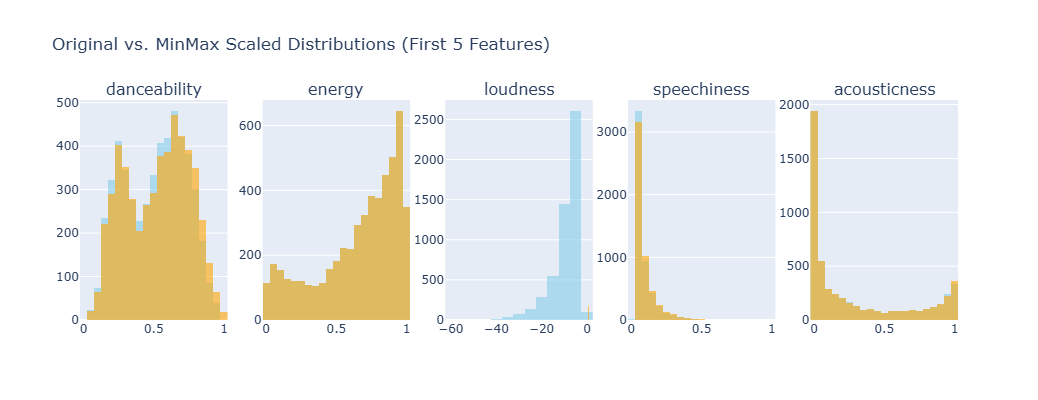

In [14]:
# Import MinMax Scaler 
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go


# Selecting numeric features only (first 5 columns as example)
num_features=5
features_to_compare = music_df.select_dtypes(include='number').iloc[:, :num_features]

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_features = pd.DataFrame(scaler_minmax.fit_transform(features_to_compare), columns=features_to_compare.columns)

# Plotting with Plotly
import plotly.subplots as sp

# Create subplot grid
fig = sp.make_subplots(rows=1, cols=num_features, subplot_titles=features_to_compare.columns)

for i, column in enumerate(features_to_compare.columns):
    fig.add_trace(
        go.Histogram(x=features_to_compare[column], name='Original', opacity=0.6, nbinsx=30, marker_color='skyblue'),
        row=1, col=i+1
    )
    fig.add_trace(
        go.Histogram(x=scaled_features[column], name='Scaled', opacity=0.6, nbinsx=30, marker_color='orange'),
        row=1, col=i+1
    )

# Layout settings
fig.update_layout(
    title_text=f"Original vs. MinMax Scaled Distributions (First {num_features} Features)",
    barmode='overlay',
    width=1000,
    height=400,
    showlegend=False  # optional: set True to show in each subplot
)

fig.show()


## Standard Scaling

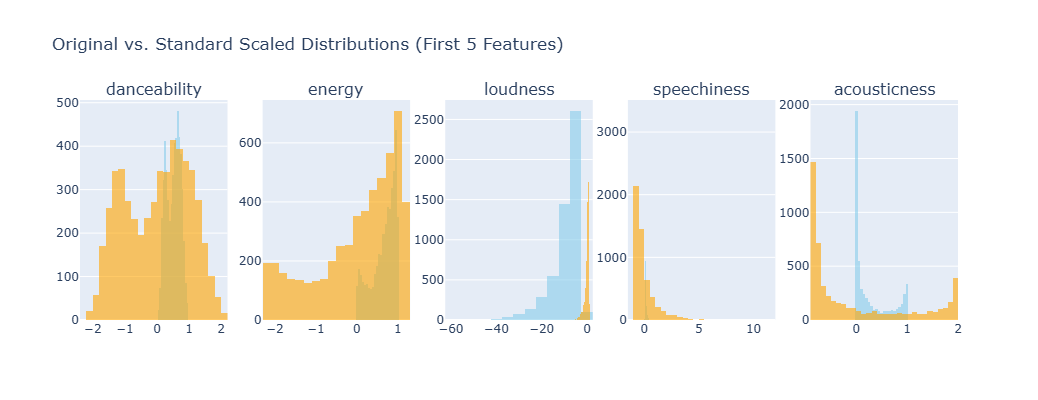

In [17]:
import plotly.graph_objects as go
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Selecting numeric features only (first 5 columns as example)
num_features=5
features_to_compare = music_df.select_dtypes(include='number').iloc[:, :num_features]

# Apply MinMaxScaler
scaler_standart = StandardScaler()
scaled_features = pd.DataFrame(scaler_standart.fit_transform(features_to_compare), columns=features_to_compare.columns)

# Plotting with Plotly
import plotly.subplots as sp

# Create subplot grid
fig = sp.make_subplots(rows=1, cols=num_features, subplot_titles=features_to_compare.columns)

for i, column in enumerate(features_to_compare.columns):
    fig.add_trace(
        go.Histogram(x=features_to_compare[column], name='Original', opacity=0.6, nbinsx=30, marker_color='skyblue'),
        row=1, col=i+1
    )
    fig.add_trace(
        go.Histogram(x=scaled_features[column], name='Scaled', opacity=0.6, nbinsx=30, marker_color='orange'),
        row=1, col=i+1
    )

# Layout settings
fig.update_layout(
    title_text=f"Original vs. Standard Scaled Distributions (First {num_features} Features)",
    barmode='overlay',
    width=1000,
    height=400,
    showlegend=False  # optional: set True to show in each subplot
)

fig.show()


## Quantile Transformer

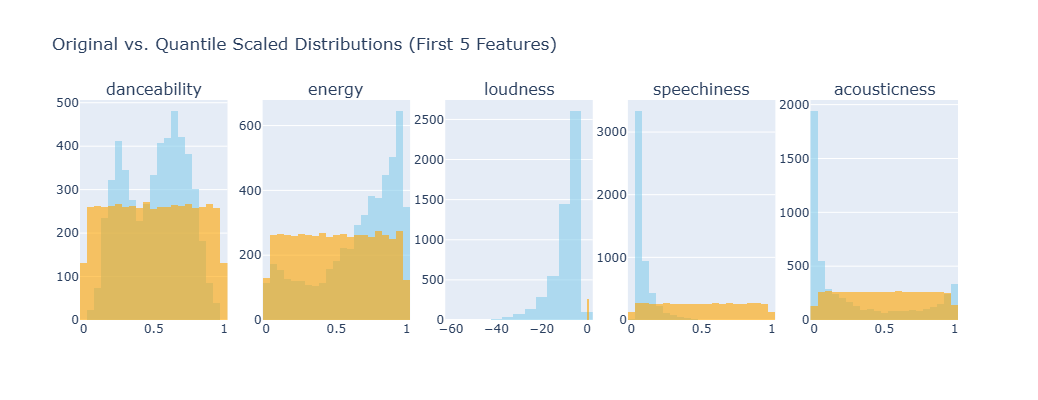

In [18]:
import plotly.graph_objects as go
# Import Quantile Transformer
from sklearn.preprocessing import QuantileTransformer

# Selecting numeric features only (first 5 columns as example)
num_features=5
features_to_compare = music_df.select_dtypes(include='number').iloc[:, :num_features]

# Apply MinMaxScaler
scaler_quantile = QuantileTransformer()
scaled_features = pd.DataFrame(scaler_quantile.fit_transform(features_to_compare), columns=features_to_compare.columns)

# Plotting with Plotly
import plotly.subplots as sp

# Create subplot grid
fig = sp.make_subplots(rows=1, cols=num_features, subplot_titles=features_to_compare.columns)

for i, column in enumerate(features_to_compare.columns):
    fig.add_trace(
        go.Histogram(x=features_to_compare[column], name='Original', opacity=0.6, nbinsx=30, marker_color='skyblue'),
        row=1, col=i+1
    )
    fig.add_trace(
        go.Histogram(x=scaled_features[column], name='Scaled', opacity=0.6, nbinsx=30, marker_color='orange'),
        row=1, col=i+1
    )

# Layout settings
fig.update_layout(
    title_text=f"Original vs. Quantile Scaled Distributions (First {num_features} Features)",
    barmode='overlay',
    width=1000,
    height=400,
    showlegend=False  # optional: set True to show in each subplot
)

fig.show()


## Power Transformer

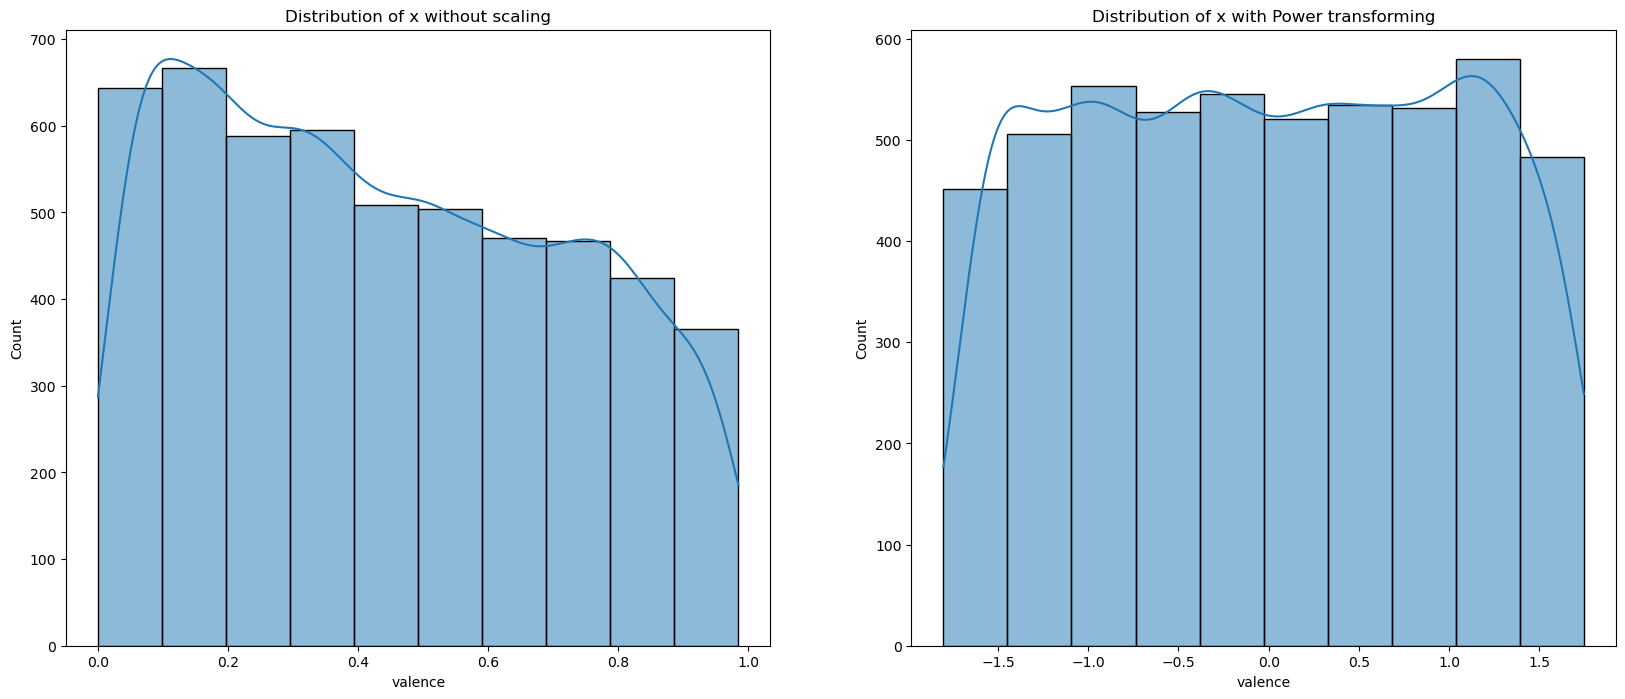

In [19]:
# Import Power Transformer
from sklearn.preprocessing import PowerTransformer

# Create DataFrame of Power transformed values
music_power_df = PowerTransformer().fit_transform(music_df)
music_power = pd.DataFrame(music_power_df, columns=music_df.columns, index=music_df.index)
music_power.head()

# Comparing two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=music_df.iloc[:,7], bins=10, kde=True, ax=ax1);
sns.histplot(data=music_power.iloc[:,7], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of x without scaling')
ax2.set_title('Distribution of x with Power transforming')

plt.show()

## Scikit Learn Euclidean Distance

In [20]:
from sklearn.metrics import pairwise_distances

music_euclidean_distance = pd.DataFrame(pairwise_distances(music_df),
                                        index=music_df.index,
                                        columns=music_df.index)
music_euclidean_distance.head()

name                                                Se Eu Quiser Falar Com Deus                                                                                                                                                        \
name                                                                                                                                                                                                                                    
Se Eu Quiser Falar Com Deus                    ...                                           0.000000                                                                                                                                   
Saudade De Bahia                               ...                                       64346.001682                                                                                                                                   
Canta Canta, Minha Gente                       ...                                      103946.001366                                                                                                                                   
Mulher Eu Sei                                  ...                                       69986.000271                                                                                                                                   
Rosa Morena                                    ...                                       17467.004491                                                                                                                                   

name                                                Saudade De Bahia                                                                                                                                                                   \
name                                                                                                                                                                                                                                    
Se Eu Quiser Falar Com Deus                    ...                                       64346.001682                                                                                                                                   
Saudade De Bahia                               ...                                           0.000000                                                                                                                                   
Canta Canta, Minha Gente                       ...                                       39600.012439                                                                                                                                   
Mulher Eu Sei                                  ...                                        5640.032195                                                                                                                                   
Rosa Morena                                    ...                                       81813.000420                                                                                                                                   

name                                                Canta Canta, Minha Gente                                                                                                                                                         \
name                                                                                                                                                                                                                                  
Se Eu Quiser Falar Com Deus                    ...                                      103946.001366                                                                                                                                 
Saudade De Bahia                           

## Comparing two features of data

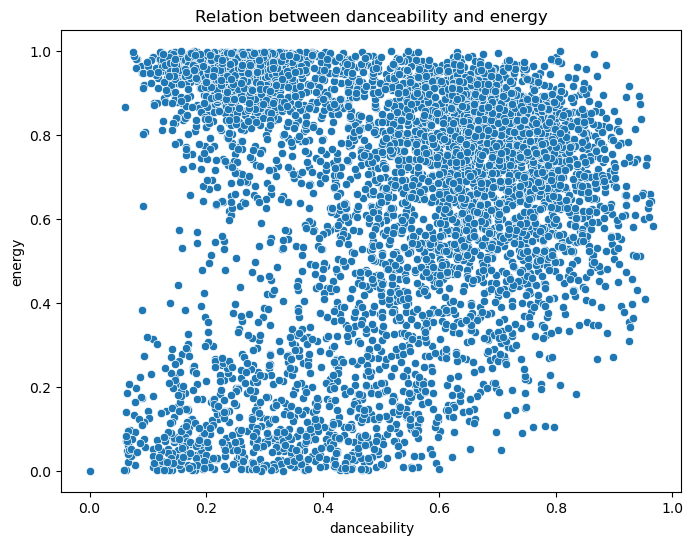

In [22]:
# Visualizing the data
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=music_df, x='danceability', y='energy')
plt.title('Relation between danceability and energy')
plt.show()

In [23]:
two_features_df = music_df[['danceability', 'energy']]
two_features_df.head()

danceability  energy
name                                                                    
Se Eu Quiser Falar Com Deus                    ...         0.658  0.2590
Saudade De Bahia                               ...         0.742  0.3990
Canta Canta, Minha Gente                       ...         0.851  0.7300
Mulher Eu Sei                                  ...         0.705  0.0502
Rosa Morena                                    ...         0.651  0.1190

In [30]:
# Import the MinMax scaler library
from sklearn.preprocessing import MinMaxScaler

two_features_scaled = MinMaxScaler().fit_transform(two_features_df)
scaled_df = pd.DataFrame(two_features_scaled, 
                        columns = ['danceability', 'energy'])

In [31]:
scaled_df.head()

danceability  energy
0      0.680455  0.2590
1      0.767322  0.3990
2      0.880041  0.7300
3      0.729059  0.0502
4      0.673216  0.1190

## K-Means Clustering

In [33]:
import warnings
warnings.filterwarnings("ignore", message=".*Could not find the number of physical cores.*")

In [34]:
# Import the library
from sklearn.cluster import KMeans

# Assuming number of  clusters k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

In [36]:
# Displaying the cluster centers
kmeans.cluster_centers_

array([[0.45442761, 0.23664383],
       [0.55277934, 0.80251906]])

In [45]:
cl_positions = pd.DataFrame(kmeans.cluster_centers_)
cl_positions.columns = ['danceability', 'energy']

In [62]:
# Creating a plot for the clusters
scaled_df['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Cluster distribution')
plt.xlabel('Danceability normalized')
plt.ylabel('Energy normalized')

# Scatter plot

sns.scatterplot(data=scaled_df, 
                x='danceability', 
                y='energy', 
                hue='cluster', 
                palette='Set2', s=75)
sns.scatterplot(data=cl_positions, 
                x='danceability', 
                y='energy', 
                color='black',
                s=350, 
                marker='X', 
                label='Centroids')
plt.show()

## K-Means Evaluating All the Data Using Standard Scaler

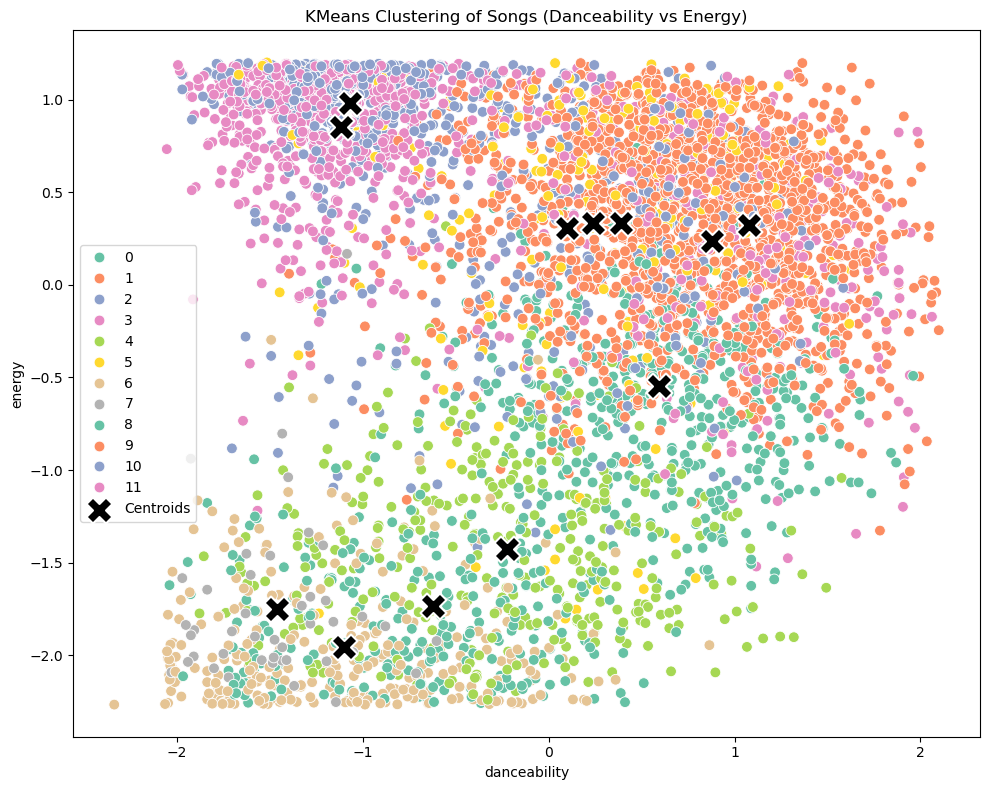

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(music_df)

# KMeans clustering (12 clusters)
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(scaled_data)

# Prepare DataFrames
columns = music_df.columns.tolist()
plot_data = pd.DataFrame(scaled_data, columns=columns)
plot_data['cluster'] = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

# Plot
plt.figure(figsize=(10, 8))

sns.scatterplot(data=plot_data, 
                x='danceability', 
                y='energy', 
                hue='cluster', 
                palette='Set2', 
                s=60)
sns.scatterplot(data=centroids, 
                x='danceability', 
                y='energy',
                color='black',
                s=350, marker='X', 
                label='Centroids')

plt.title("KMeans Clustering of Songs (Danceability vs Energy)")
plt.legend()
plt.tight_layout()
plt.show()


## Note on this 2D visualization

This scatter plot displays the results of KMeans clustering with 12 clusters, applied to the dataset using 10 standardized audio features (e.g., danceability, energy, loudness, etc.). The clustering itself was performed in 10-dimensional space, but for visual clarity, only two features — 'danceability' and 'energy' — are shown here.

As a result, the spatial positioning of points in this 2D plot may not fully represent the true similarity relationships defined by the clustering algorithm. Songs that appear far apart in this plot may belong to the same cluster due to similarity in other dimensions, and vice versa.

This visual provides a simplified glimpse into the clustering structure but does not capture the full complexity of the feature space. To better understand and compare the multidimensional characteristics of each cluster, we will use radar plots in the next section. These offer a more holistic view of how clusters differ across all audio features.

# Radar Chart

In [71]:
centroids.head()

danceability    energy  loudness  speechiness  acousticness  \
0     -0.623242 -1.733077 -1.699508    -0.523120      1.798608   
1      1.078829  0.324797  0.505918    -0.228195     -0.457780   
2      0.096277  0.306703  0.406364    -0.123929     -0.178015   
3     -1.118268  0.854209  0.137612     0.229847     -0.790123   
4     -0.225415 -1.423884 -0.758445    -0.546586      1.465373   

   instrumentalness  liveness   valence     tempo  duration_ms  
0          1.539044 -0.338344 -0.874833  0.600869     0.075204  
1         -0.618467 -0.269317  1.151296 -0.276537    -0.190369  
2         -0.488994 -0.170470  0.860167  1.687326    -0.274164  
3          1.499596  0.044367 -0.756390  0.100018     0.066744  
4         -0.576062 -0.203765 -0.487981 -0.397577     0.079251

In [73]:
import pandas as pd
import plotly.graph_objects as go

# center dataframe
# If it's not already ,reset the index and name the clusters
radar_df = centroids.reset_index().rename(columns={'index': 'cluster'})
radar_df['cluster'] = radar_df.index.astype(str)  # Ensure cluster labels are strings

# List of feature names
categories = radar_df.columns[1:]  # exclude 'cluster' column

# Create radar chart
fig = go.Figure()

# Add each cluster as a trace
for i, row in radar_df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r = row[categories].values.tolist() + [row[categories].values[0]],  # close the loop
        theta = list(categories) + [categories[0]],
        name = f"Cluster {row['cluster']}",
        visible = True,
        fill='toself',
        opacity=0.5
    ))
    

# Customize layout
fig.update_layout(
    title="Cluster Feature Profiles (Interactive Radar Chart)",
    polar=dict(
        radialaxis=dict(visible=True, showticklabels=True, ticks='outside')
    ),
    showlegend=True,
    height=700,
    width=800
)

fig.show()


## K-Means Choosing Clusters

### Elbow Method and Inertia

Inertia measures how internally coherent clusters are — it's the sum of squared distances from each point to its assigned cluster center.
Lower inertia is better, but as we increase the number of clusters, inertia always goes down. The elbow is the point where adding more clusters doesn't significantly improve the model — that's our sweet spot

In [75]:
from sklearn.preprocessing import StandardScaler
music_df_standard = StandardScaler().fit_transform(music_df)

kmeans_all = KMeans(n_clusters=3, random_state=42)
music_kmeans = kmeans_all.fit(music_df_standard)

In [76]:
music_kmeans.inertia_

32385.196324030163

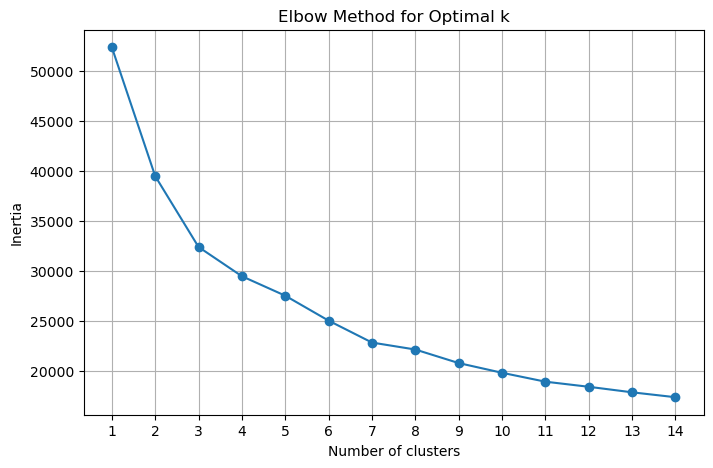

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(music_df_standard)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


## Silhouette Method

While inertia shows how compact the clusters are, silhouette score evaluates how well-separated the clusters are, offering a more complete view of clustering quality.

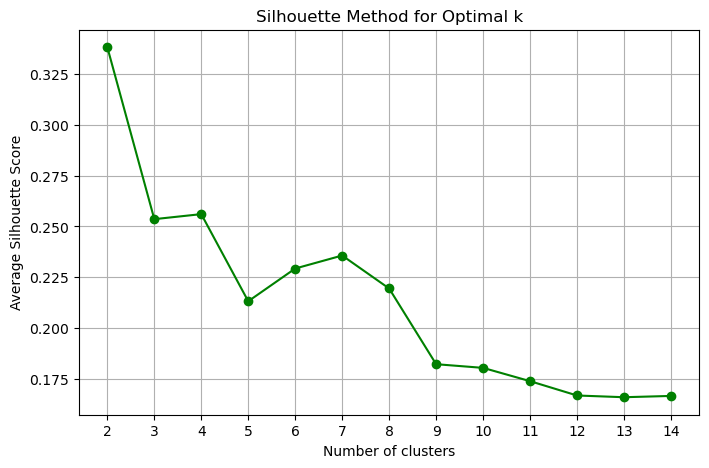

In [81]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

silhouette_scores = []
cluster_range = range(2, 15)  # Must start from 2 because silhouette isn't defined for k=1

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(music_df_standard)
    score = silhouette_score(music_df_standard, labels)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
